# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

seed нужен для того, чтобы каждый раз выводилось одно и то же случайное число. В нашем случае это поможет проверяющему воспроизвести результаты. Также одни и те же случайные числа могут помочь отладить код + при сравнении моделей важно, чтобы условия эксперимента были одинаковы, включая случайные элементы.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
# 10 случайных строк тренировочного датасета
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [4]:
# Первые 5 объектов тестового датасета
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [5]:
# Последние 5 объектов тестового датасета
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [6]:
# Смотрим на пропуски в тренировочном и тестовом датасете
print('Выводим названия колонок в df_train, для которых есть пропущенные значения')
for index, row in pd.DataFrame(pd.isnull(df_train).sum()).iterrows():
    for column in pd.DataFrame(pd.isnull(df_train).sum()).columns:
        if row[column] != 0:
            print(index, row[column])

Выводим названия колонок в df_train, для которых есть пропущенные значения
mileage 202
engine 202
max_power 196
torque 203
seats 202


In [7]:
# Смотрим на пропуски в тренировочном и тестовом датасете
print('Выводим названия колонок в df_test, для которых есть пропущенные значения')
for index, row in pd.DataFrame(pd.isnull(df_test).sum()).iterrows():
    for column in pd.DataFrame(pd.isnull(df_test).sum()).columns:
        if row[column] != 0:
            print(index, row[column])

Выводим названия колонок в df_test, для которых есть пропущенные значения
mileage 19
engine 19
max_power 19
torque 19
seats 19


In [8]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

Чтобы убедиться, что у нас пропущены значения только в 5 колонках, посмотрим на уникальные значения для переменных object. Ниже приведена только часть кода, когда искали пропуски '' тк пропусков не нашлось (и нет смысла показывать это для всех переменных)

In [9]:
count = 0
for obj in df_train['name'].unique():
    if obj.replace(' ', '') == '':
        count += 1
print(count)

0


In [10]:
# Посмотрим на явные дубликаты в df_train
if df_train.duplicated().all() == False:
    print('Явных дубликатов в df_train нет')
else:
    print('Явные дубликаты в df_train есть')

Явных дубликатов в df_train нет


In [11]:
# Посмотрим на явные дубликаты в df_test
if df_test.duplicated().all() == False:
    print('Явных дубликатов в df_test нет')
else:
    print('Явные дубликаты в df_test есть')

Явных дубликатов в df_test нет


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [12]:
import statistics as s
import math
import re

In [13]:
# mileage
kmpl = []
for obj in df_train['mileage']:
    if type(obj) == str:
        obj = obj.split()
        kmpl.append(float(obj[0]))
print(f'Медиана для переменной "mileage" равна: {s.median(kmpl)}')

Медиана для переменной "mileage" равна: 19.3


In [14]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['mileage'].isnull() == True, 'mileage'] = '19.3 kmpl'
df_test.loc[df_test['mileage'].isnull() == True, 'mileage'] = '19.3 kmpl'

In [15]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['mileage']).sum())
print(pd.isnull(df_test['mileage']).sum())

0
0


In [16]:
# engine
CC = []
for obj in df_train['engine']:
    if type(obj) == str:
        obj = obj.split()
        CC.append(float(obj[0]))
print(f'Медиана для переменной "engine" равна: {s.median(CC)}')

Медиана для переменной "engine" равна: 1248.0


In [17]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['engine'].isnull() == True, 'engine'] = '1248.0 CC'
df_test.loc[df_test['engine'].isnull() == True, 'engine'] = '1248.0 CC'

In [18]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['engine']).sum())
print(pd.isnull(df_test['engine']).sum())

0
0


В переменной max_power помимо пропусков со значением nan, есть еще пропуски такие: 'bhp' т.е. нет цифровенного значения.

In [19]:
# max_power
bhp = []
count_bhp = 0
for obj in df_train['max_power']:
    if type(obj) == str:
        if obj.replace(' ', '') != 'bhp':
            obj = obj.split()
            bhp.append(float(obj[0]))
        else:
            count_bhp += 1
print(f'Медиана равна: {s.median(bhp)}, количество пропусков с bhp: {count_bhp}')

Медиана равна: 82.0, количество пропусков с bhp: 1


In [20]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['max_power'].isnull() == True, 'max_power'] = '82.0 bhp'
df_test.loc[df_test['max_power'].isnull() == True, 'max_power'] = '82.0 bhp'

In [21]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['max_power']).sum())
print(pd.isnull(df_test['max_power']).sum())

0
0


In [22]:
for i in range(len(df_train['max_power'])):
    if df_train['max_power'][i].replace(' ', '') == 'bhp':
        df_train['max_power'][i] = '82.0 bhp'

for i in range(len(df_test['max_power'])):
    if df_test['max_power'][i].replace(' ', '') == 'bhp':
        df_test['max_power'][i] = '82.0 bhp'

<ipython-input-22-7e1bb54c50fc>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_train['max_power'][i] = '82.0 bhp'
<ipython-input-22-7e1bb54c50fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [23]:
# Проверяем заполнение пропусков
count_bhp = 0
for obj in df_train['max_power']:
    if obj.replace(' ', '') == 'bhp':
        count_bhp += 1
count_bhp

0

In [24]:
count_bhp = 0
for obj in df_test['max_power']:
    if obj.replace(' ', '') == 'bhp':
        count_bhp += 1
count_bhp

0

In [25]:
# torque
df_train['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
4               113.75nm@ 4000rpm
                  ...            
6994             113.7Nm@ 4000rpm
6995    24@ 1,900-2,750(kgm@ rpm)
6996               190Nm@ 2000rpm
6997          140Nm@ 1800-3000rpm
6998          140Nm@ 1800-3000rpm
Name: torque, Length: 6999, dtype: object

Для переменной torque нельзя найти медиану (точнее можно было бы, если бы было какое-то описание единиц измерения). Для этой переменной можно найти моду. Я видела спойлер в 3 задании, что torque нужно будет удалить, но сделаю вид, что не знаю об этом.

In [26]:
print(f"Мода для переменной torque: {df_train['torque'].mode()[0]}")

Мода для переменной torque: 190Nm@ 2000rpm


In [27]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['torque'].isnull() == True, 'torque'] = '190Nm@ 2000rpm'
df_test.loc[df_test['torque'].isnull() == True, 'torque'] = '190Nm@ 2000rpm'

In [28]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['torque']).sum())
print(pd.isnull(df_test['torque']).sum())

0
0


In [29]:
# seats
m = []
for obj in df_train['seats']:
    if math.isnan(obj) != True:
        m.append(obj)
print(f'Медиана для переменной "engine" равна: {s.median(m)}')

Медиана для переменной "engine" равна: 5.0


In [30]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['seats'].isnull() == True, 'seats'] = 5.0
df_test.loc[df_test['seats'].isnull() == True, 'seats'] = 5.0

In [31]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['seats']).sum())
print(pd.isnull(df_test['seats']).sum())

0
0


In [32]:
# Итоговая проверка для df_train
pd.isnull(df_train).sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [33]:
# Итоговая проверка для df_test
pd.isnull(df_test).sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [34]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

Целевая переменная — это переменная, которую модель машинного обучения пытается предсказать или объяснить. В нашем случае целевой переменной является 'selling_price'.

In [35]:
duplicates = df_train.drop(columns=['selling_price']).duplicated(keep=False)
print(f'Количество дубликатов: {df_train[duplicates].shape[0]}')

Количество дубликатов: 1799


In [36]:
# Выводим дубликаты
df_train[duplicates]

name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4 kmpl   
26        25000  Petrol  Individual       Manual   First Owner   16.8 kmpl   
27        70000  Diesel  Individual       Manual   First Owner   24.3 kmpl   
28        50000  Petrol  Individual       Manual  Second Owner   19.3 kmpl   
29        35000  Petrol  Individual       Manual  Second Owner   14.0 kmpl   
...         ...     ...         ...          ...           ...         ...   
6981      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

         engine  max_power               torque  seats  
22      1197 CC   83.1 bhp       115Nm@ 4000rpm    5.0  
26       796 CC   34.2 bhp        59Nm@ 2500rpm    8.0  
27      1248 CC   88.5 bhp       200Nm@ 1750rpm    5.0  
28    1248.0 CC   82.0 bhp       190Nm@ 2000rpm    5.0  
29       796 CC     35 bhp      6.1kgm@ 3000rpm    5.0  
...         ...        ...                  ...    ...  
6981    1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6984    1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989    1248 CC     74 bhp       190Nm@ 2000rpm    5.0  
6997    1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  
6998    1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 13 columns]

In [37]:
# Удаляем повторяющиеся строки
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
6992  Petrol  Individual       Manual           First Owner  17.92 kmpl   
6993  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
6994  Petrol  Individual       Manual           First Owner   18.5 kmpl   
6995  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
6996  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
6992  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
6993   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
6994  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [38]:
# Обновляем индексы
df_train = df_train.reset_index(drop=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [39]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [40]:
# Сначала переименуем столбцы в df_train и df_test
df_train.rename(columns = {'mileage': 'mileage (kmpl)', 'engine': 'engine (CC)', 'max_power': 'max_power (bhp)'}, inplace=True)
df_test.rename(columns = {'mileage': 'mileage (kmpl)', 'engine': 'engine (CC)', 'max_power': 'max_power (bhp)'}, inplace=True)

# Проверим
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner mileage (kmpl) engine (CC)  \
0  Individual       Manual   First Owner      23.4 kmpl     1248 CC   
1  Individual       Manual  Second Owner     21.14 kmpl     1498 CC   
2  Individual       Manual   First Owner      23.0 kmpl     1396 CC   
3  Individual       Manual   First Owner      16.1 kmpl     1298 CC   
4  Individual       Manual   First Owner     20.14 kmpl     1197 CC   

  max_power (bhp)                    torque  seats  
0          74 bhp            190Nm@ 2000rpm    5.0  
1      103.52 bhp       250Nm@ 1500-2500rpm    5.0  
2          90 bhp  22.4 kgm at 1750-2750rpm    5.0  
3        88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0  
4       81.86 bhp         113.75nm@ 4000rpm    5.0

In [41]:
# Удалим столбец torque
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

# Проверим
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner mileage (kmpl) engine (CC)  \
0  Individual       Manual   First Owner      23.4 kmpl     1248 CC   
1  Individual       Manual  Second Owner     21.14 kmpl     1498 CC   
2  Individual       Manual   First Owner      23.0 kmpl     1396 CC   
3  Individual       Manual   First Owner      16.1 kmpl     1298 CC   
4  Individual       Manual   First Owner     20.14 kmpl     1197 CC   

  max_power (bhp)  seats  
0          74 bhp    5.0  
1      103.52 bhp    5.0  
2          90 bhp    5.0  
3        88.2 bhp    5.0  
4       81.86 bhp    5.0

In [42]:
# Уберем единицы измерения
def processing(x):
    try:
        return float(x.split()[0])
    except (ValueError, IndexError):
        return None

columns_to_process = ['mileage (kmpl)', 'engine (CC)', 'max_power (bhp)']
df_train[columns_to_process] = df_train[columns_to_process].applymap(processing)
df_test[columns_to_process] = df_test[columns_to_process].applymap(processing)

# Проверим
df_train.head()

<ipython-input-42-6b68c2287b38>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train[columns_to_process] = df_train[columns_to_process].applymap(processing)
<ipython-input-42-6b68c2287b38>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test[columns_to_process] = df_test[columns_to_process].applymap(processing)


name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage (kmpl)  engine (CC)  \
0  Individual       Manual   First Owner           23.40       1248.0   
1  Individual       Manual  Second Owner           21.14       1498.0   
2  Individual       Manual   First Owner           23.00       1396.0   
3  Individual       Manual   First Owner           16.10       1298.0   
4  Individual       Manual   First Owner           20.14       1197.0   

   max_power (bhp)  seats  
0            74.00    5.0  
1           103.52    5.0  
2            90.00    5.0  
3            88.20    5.0  
4            81.86    5.0

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [43]:
# Посмотрим сколько Кб занимают наши таблички
print(df_train.memory_usage(deep=True).sum() / 1024)
print(df_test.memory_usage(deep=True).sum() / 1024)

2278.8447265625
390.1162109375


In [44]:
# Преобразуем столбцы engnine и seats к типу int
df_train = df_train.astype({'engine (CC)': 'int', 'seats': 'int'}, copy=False)
df_test = df_test.astype({'engine (CC)': 'int', 'seats': 'int'}, copy=False)

In [45]:
# Преобразуем в более "узкие" типы данных
fcols = df_train.select_dtypes('float').columns
icols = df_train.select_dtypes('integer').columns

df_train[fcols] = df_train[fcols].apply(pd.to_numeric, downcast='float')
df_train[icols] = df_train[icols].apply(pd.to_numeric, downcast='integer')

df_test[fcols] = df_test[fcols].apply(pd.to_numeric, downcast='float')
df_test[icols] = df_test[icols].apply(pd.to_numeric, downcast='integer')

In [46]:
# Посмотрим сколько теперь Кб занимают наши таблички
print(df_train.memory_usage(deep=True).sum() / 1024)
print(df_test.memory_usage(deep=True).sum() / 1024)

2079.2353515625
355.9365234375


In [47]:
# Проверим
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage (kmpl)  engine (CC)  \
0  Individual       Manual   First Owner       23.400000         1248   
1  Individual       Manual  Second Owner       21.139999         1498   
2  Individual       Manual   First Owner       23.000000         1396   
3  Individual       Manual   First Owner       16.100000         1298   
4  Individual       Manual   First Owner       20.139999         1197   

   max_power (bhp)  seats  
0        74.000000      5  
1       103.519997      5  
2        90.000000      5  
3        88.199997      5  
4        81.860001      5

In [48]:
df_train.dtypes

name                object
year                 int16
selling_price        int32
km_driven            int32
fuel                object
seller_type         object
transmission        object
owner               object
mileage (kmpl)     float32
engine (CC)          int16
max_power (bhp)    float32
seats                 int8
dtype: object

Переменные ниже можно перевести из типа object в category

In [49]:
len(df_train['name'].unique())

1924

Переменная 'name' тоже является категориальной. В ней просто слишком много категорий.

In [50]:
df_train['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [51]:
df_train['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [52]:
df_train['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [53]:
df_train['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [54]:
df_train[['name', 'fuel', 'seller_type', 'transmission', 'owner']] = df_train[['name', 'fuel', 'seller_type', 'transmission', 'owner']].astype('category')
df_test[['name', 'fuel', 'seller_type', 'transmission', 'owner']] = df_test[['name', 'fuel', 'seller_type', 'transmission', 'owner']].astype('category')

In [55]:
# Посмотрим сколько теперь Кб занимают наши таблички
print(df_train.memory_usage(deep=True).sum() / 1024)
print(df_test.memory_usage(deep=True).sum() / 1024)

377.9599609375
94.2998046875


In [56]:
df_train.dtypes

name               category
year                  int16
selling_price         int32
km_driven             int32
fuel               category
seller_type        category
transmission       category
owner              category
mileage (kmpl)      float32
engine (CC)           int16
max_power (bhp)     float32
seats                  int8
dtype: object

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [57]:
# Основные статистики по числовым столбцам для df_train
df_train.describe(include=['integer', 'float'])

year  selling_price     km_driven  mileage (kmpl)  engine (CC)  \
count  5840.000000   5.840000e+03  5.840000e+03     5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04       19.428612  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04        3.986024   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00        0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04       16.950001  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04       19.299999  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05       22.299999  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06       42.000000  3604.000000   

       max_power (bhp)        seats  
count      5840.000000  5840.000000  
mean         87.910774     5.426712  
std          31.639635     0.982344  
min           0.000000     2.000000  
25%          68.000000     5.000000  
50%          81.860001     5.000000  
75%          99.000000     5.000000  
max         400.000000    14.000000

In [58]:
# Основные статистики по числовым столбцам для df_test
df_test.describe(include=['integer', 'float'])

year  selling_price      km_driven  mileage (kmpl)  engine (CC)  \
count  1000.000000   1.000000e+03    1000.000000     1000.000000   1000.00000   
mean   2013.681000   6.179010e+05   71393.341000       19.337481   1454.87600   
std       4.012149   7.585539e+05   48486.218662        3.951751    521.99574   
min    1995.000000   3.100000e+04    1303.000000        0.000000    624.00000   
25%    2011.000000   2.500000e+05   37000.000000       16.549999   1197.00000   
50%    2014.000000   4.349990e+05   61500.000000       19.299999   1248.00000   
75%    2017.000000   6.700000e+05  100000.000000       22.299999   1582.00000   
max    2020.000000   6.000000e+06  375000.000000       32.259998   3604.00000   

       max_power (bhp)        seats  
count      1000.000000  1000.000000  
mean         90.844330     5.403000  
std          34.892735     0.912921  
min          34.200001     4.000000  
25%          69.000000     5.000000  
50%          82.424999     5.000000  
75%         102.000000     5.000000  
max         280.000000     9.000000

In [59]:
# Основные статистики по категориальным столбцам для df_train
df_train.describe(include=['category'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [60]:
# Основные статистики по категориальным столбцам для df_test
df_test.describe(include=['category'])

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [61]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

In [62]:
from tqdm.auto import tqdm

0it [00:00, ?it/s]

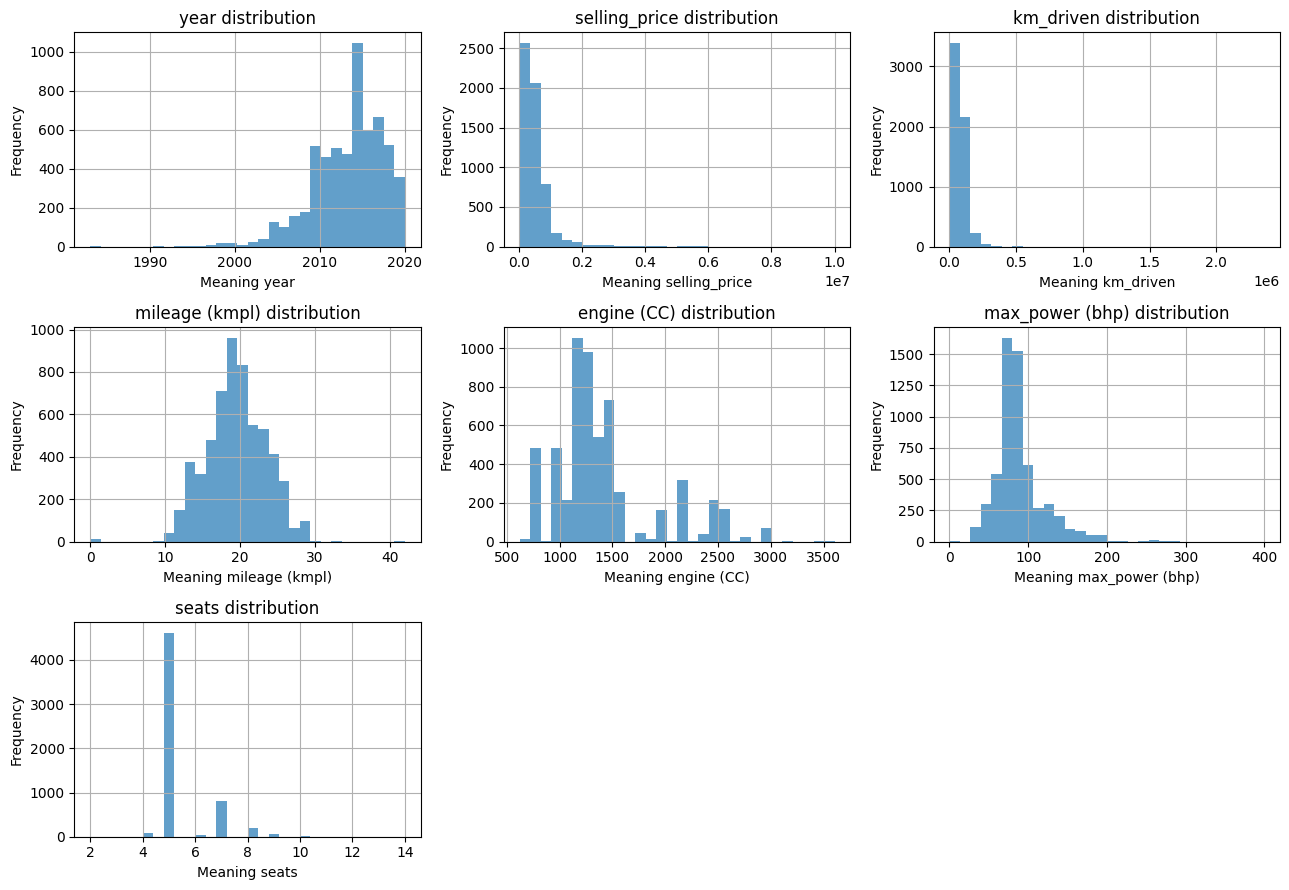

In [63]:
# Посмотрим на распределение в df_train
numeric_cols = df_train.select_dtypes(['integer', 'float']).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(13, (num_cols // 3 + 1) * 3))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df_train[col], bins=30, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(f'Meaning {col}')
    ax.set_ylabel('Frequency')
    ax.grid(True)

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

0it [00:00, ?it/s]

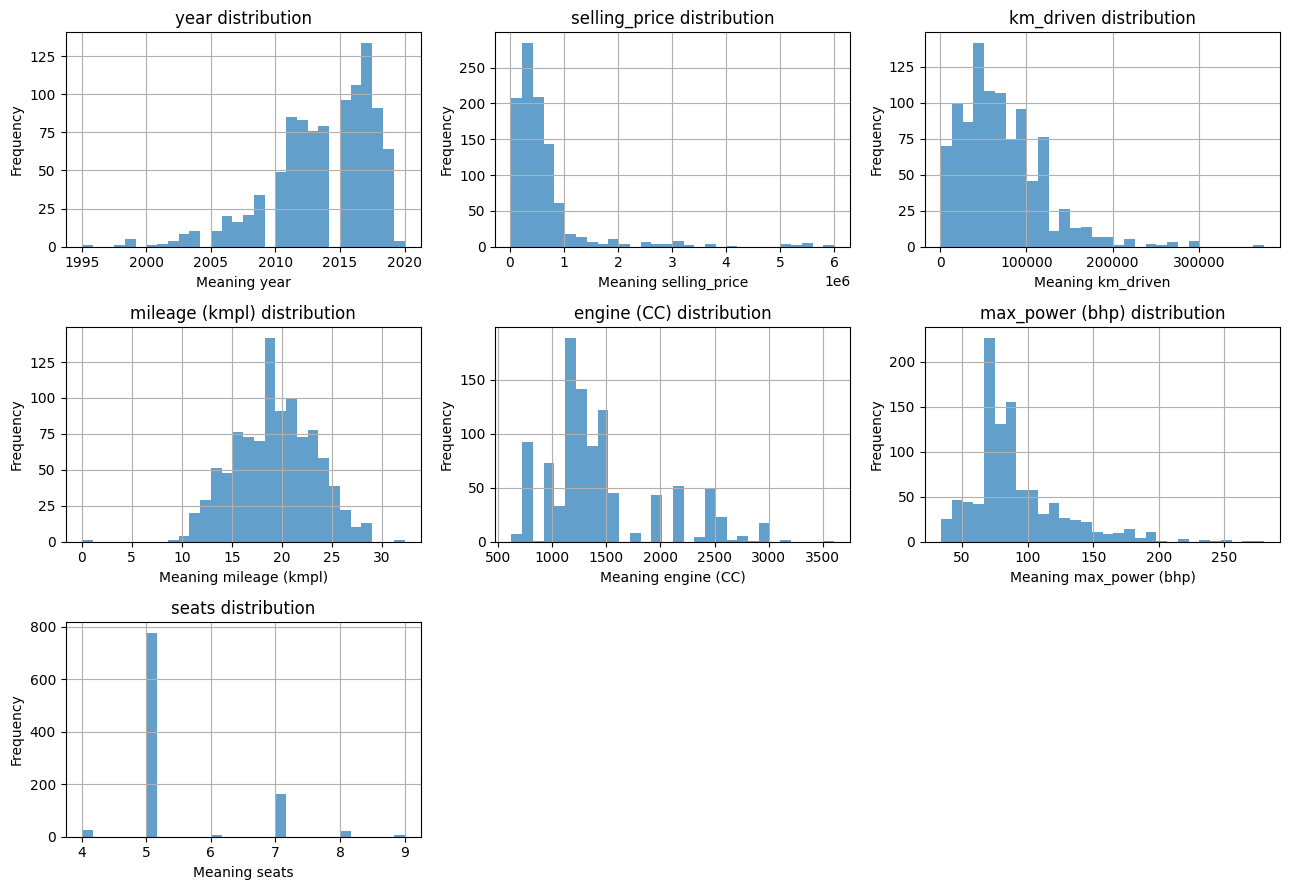

In [64]:
# Посмотрим на распределение в df_test
numeric_cols = df_test.select_dtypes(['integer', 'float']).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(13, (num_cols // 3 + 1) * 3))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df_test[col], bins=30, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(f'Meaning {col}')
    ax.set_ylabel('Frequency')
    ax.grid(True)

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Распределения  train и test достаточно похожи.

Если смотреть на гистограммы, то можно увидеть, что у целевой переменной есть связь между engine (CC) и max_power (bhp).

In [65]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage (kmpl)  engine (CC)  \
0  Individual       Manual   First Owner       23.400000         1248   
1  Individual       Manual  Second Owner       21.139999         1498   
2  Individual       Manual   First Owner       23.000000         1396   
3  Individual       Manual   First Owner       16.100000         1298   
4  Individual       Manual   First Owner       20.139999         1197   

   max_power (bhp)  seats  
0        74.000000      5  
1       103.519997      5  
2        90.000000      5  
3        88.199997      5  
4        81.860001      5

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

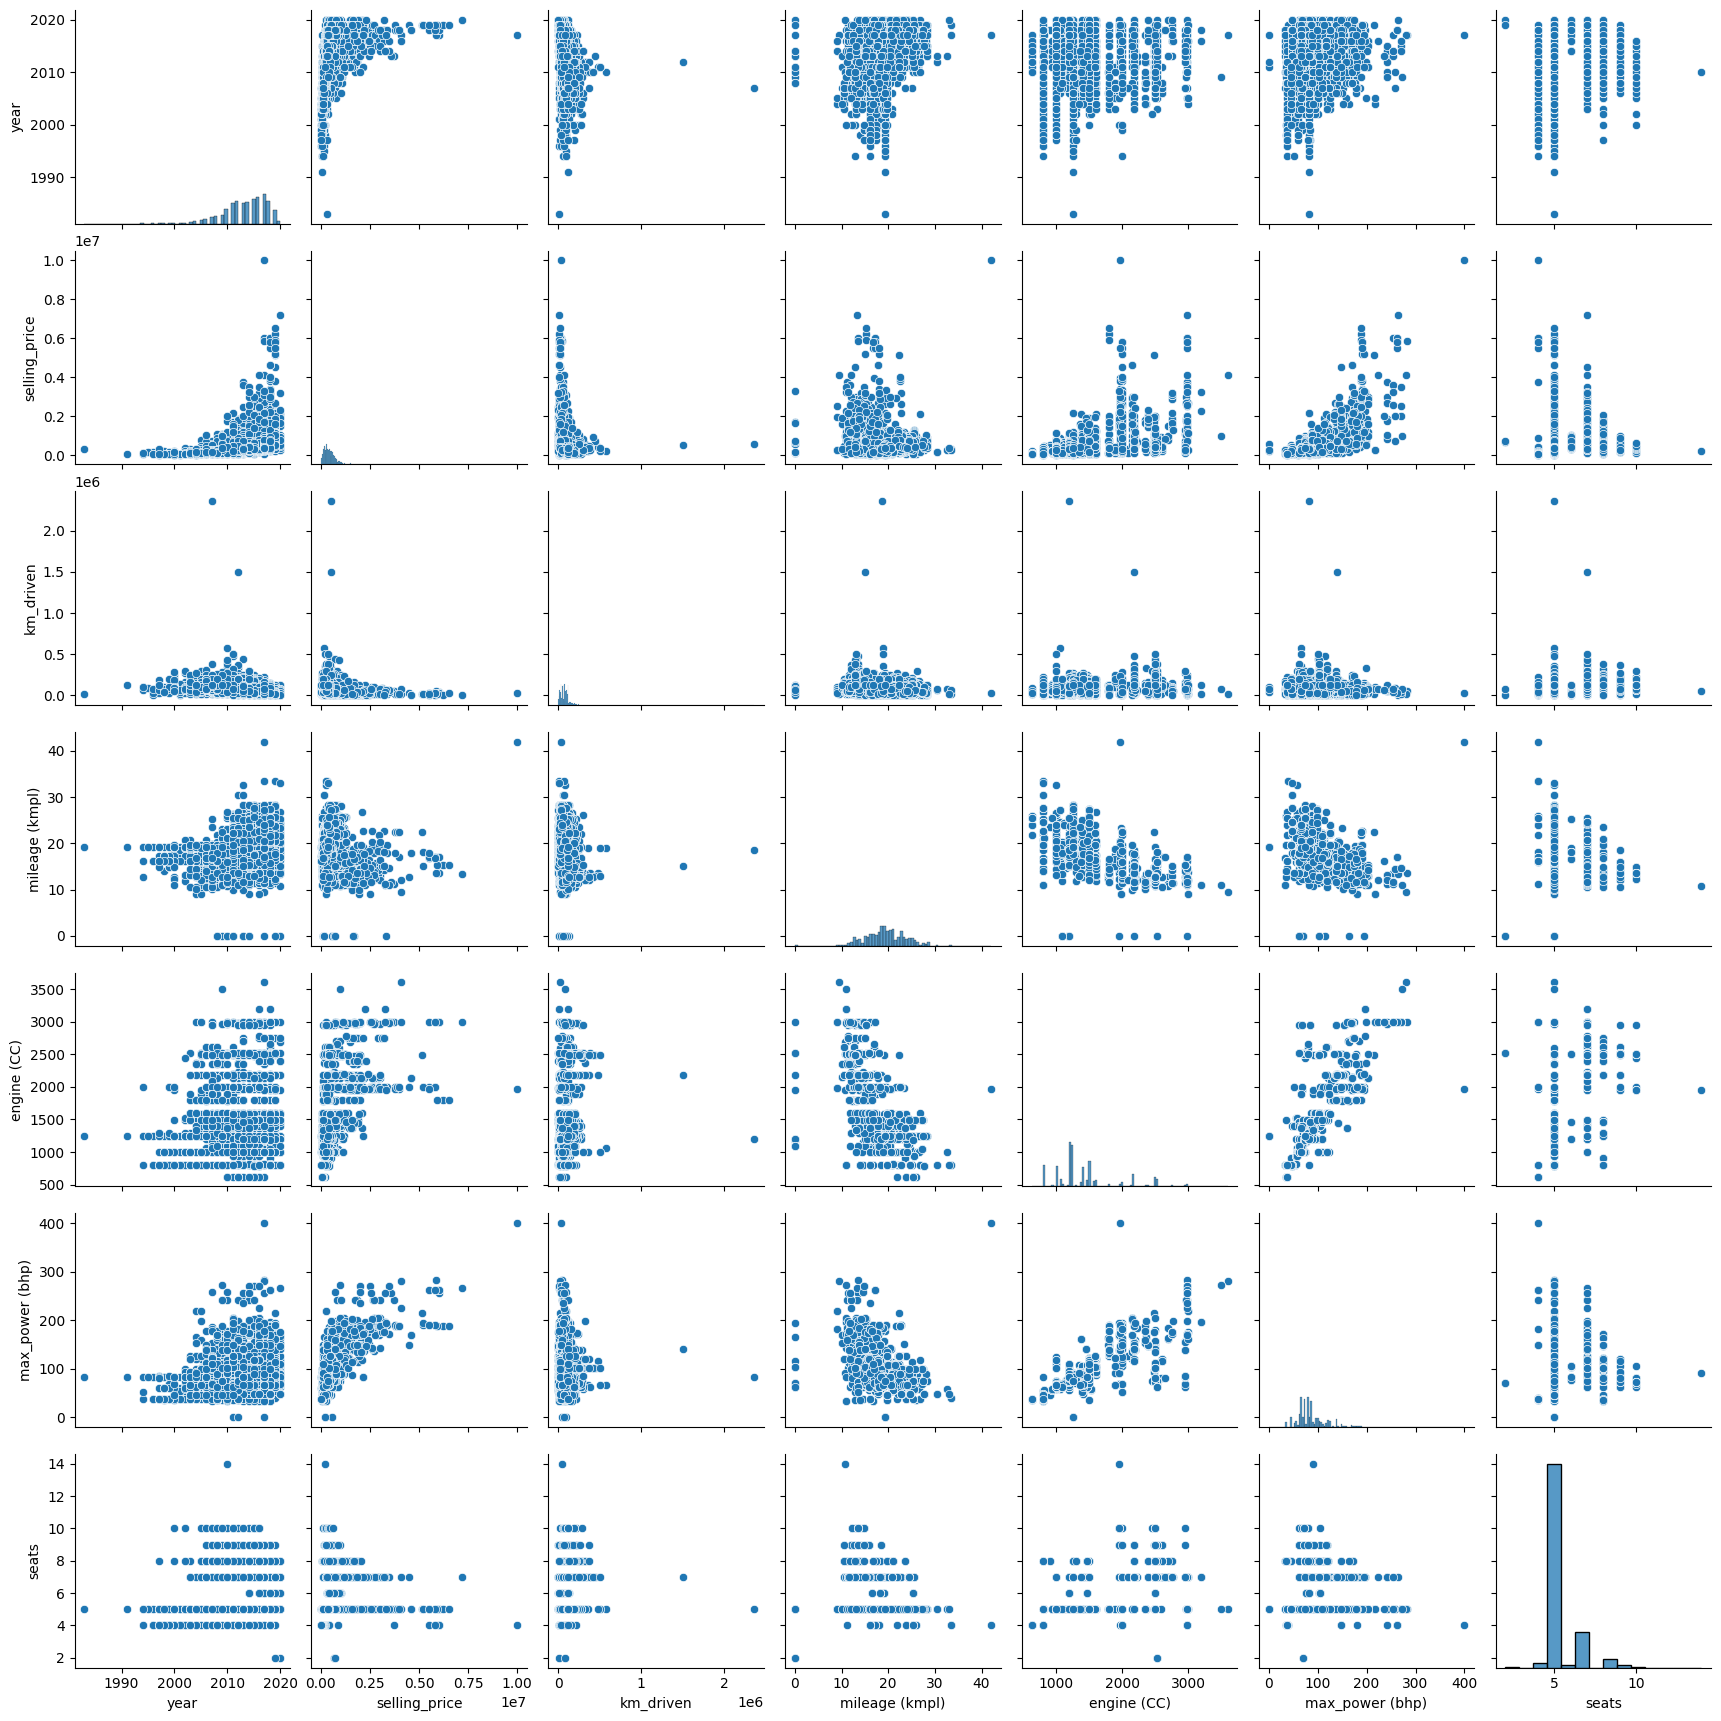

In [66]:
sns.pairplot(df_train)
plt.show()

На основе распределений признаков в сочетании с целевой переменной можно выдвинуть гипотезы о связи признаков с целевой переменной и корреляциях между ними. Однако, визуализация дает только предварительные предположения, и для получения окончательных выводов необходимо использовать статистические методы.



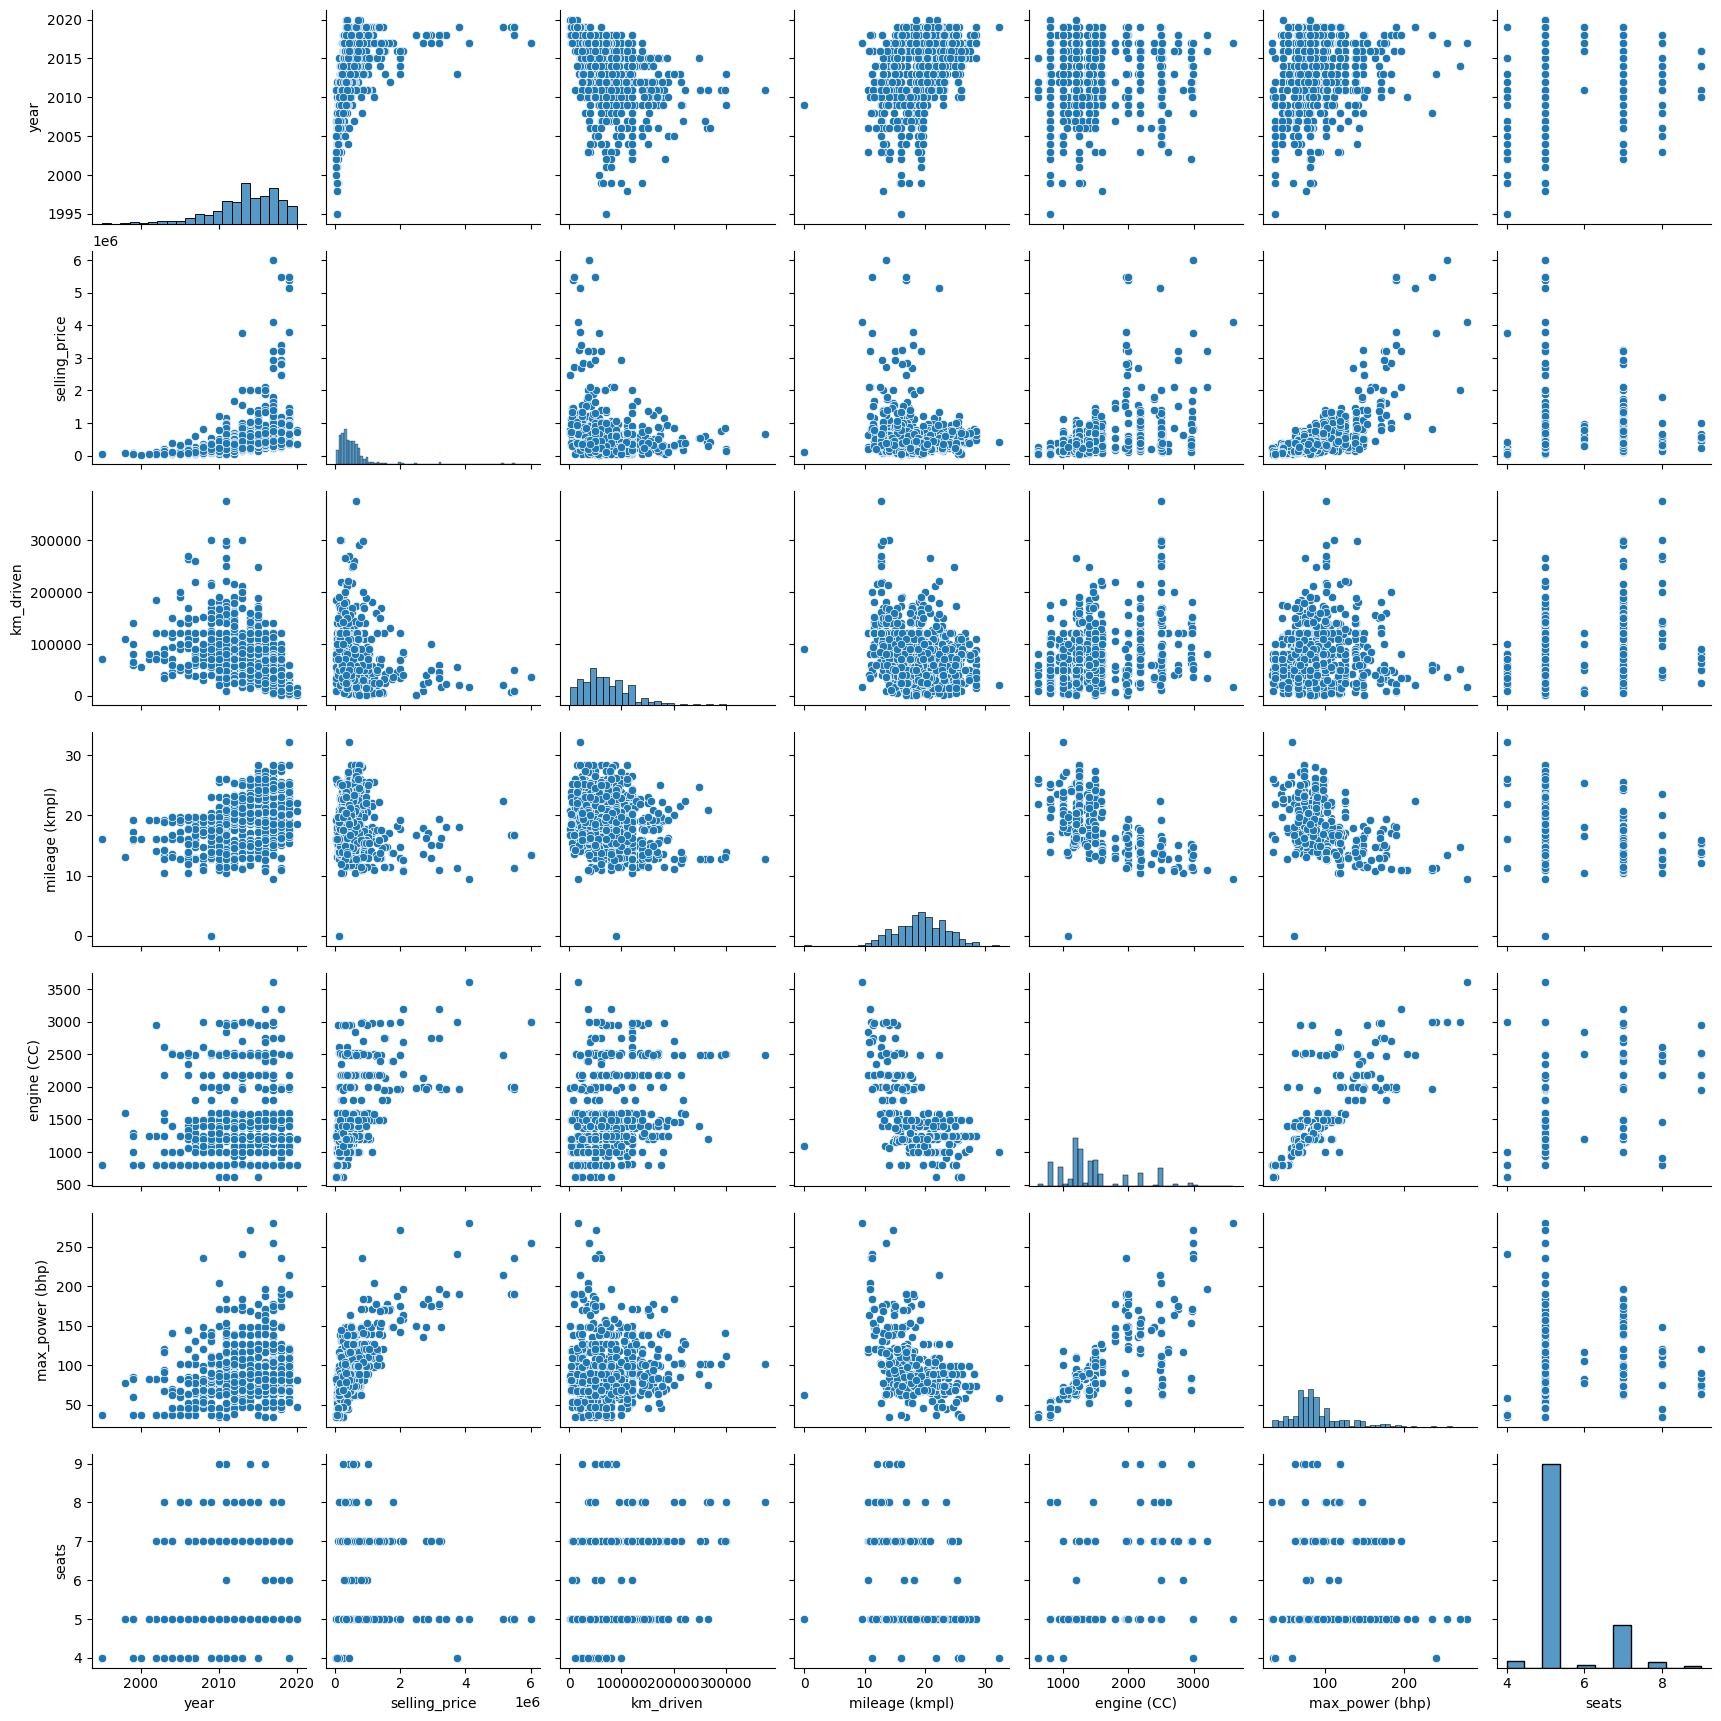

In [67]:
sns.pairplot(df_test)
plt.show()

В целом, совокупности оказались похожи. Есть, конечно, небольшие различия, но это ничего страшного.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [68]:
import seaborn as sns

In [69]:
df_train.corr(numeric_only=True)

year  selling_price  km_driven  mileage (kmpl)  \
year             1.000000       0.427279  -0.368966        0.342172   
selling_price    0.427279       1.000000  -0.164828       -0.104458   
km_driven       -0.368966      -0.164828   1.000000       -0.182245   
mileage (kmpl)   0.342172      -0.104458  -0.182245        1.000000   
engine (CC)      0.002819       0.447672   0.229766       -0.572677   
max_power (bhp)  0.156648       0.692754   0.024630       -0.373271   
seats            0.041178       0.149953   0.192328       -0.450810   

                 engine (CC)  max_power (bhp)     seats  
year                0.002819         0.156648  0.041178  
selling_price       0.447672         0.692754  0.149953  
km_driven           0.229766         0.024630  0.192328  
mileage (kmpl)     -0.572677        -0.373271 -0.450810  
engine (CC)         1.000000         0.681082  0.652172  
max_power (bhp)     0.681082         1.000000  0.244060  
seats               0.652172         0.244060  1.000000

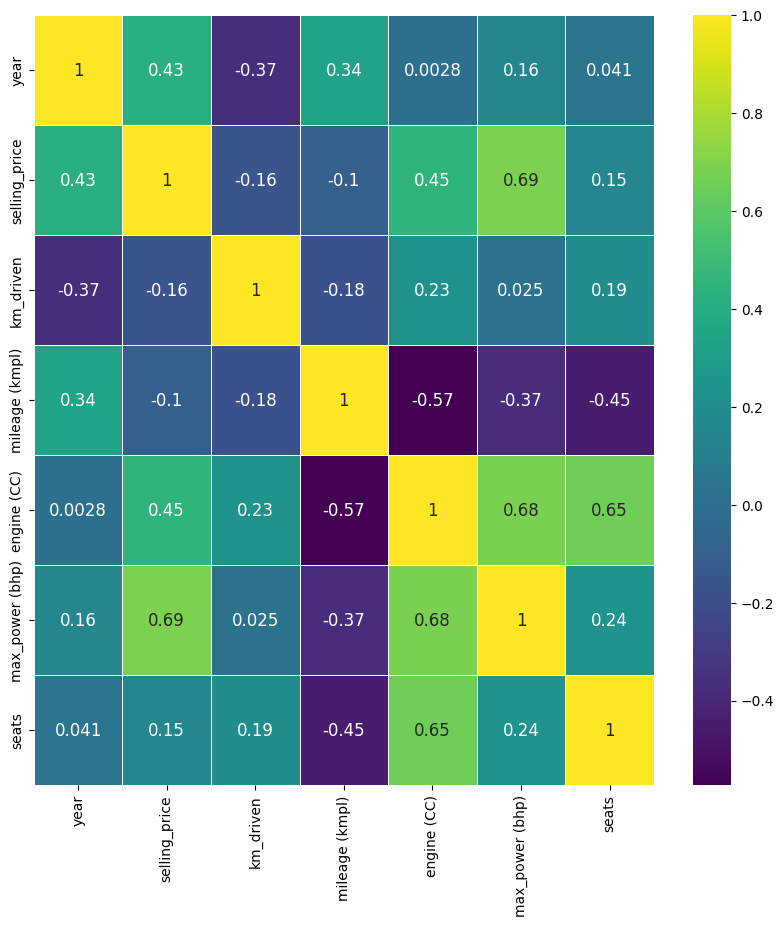

In [70]:
# Посмотрим на связь всех признаков с целевой переменной
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df_train.corr(numeric_only=True),
            linewidths=0.5, annot=True, cmap='viridis',
            linecolor='white', annot_kws={'size':12})

plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Значения коэффициента корреляции Пирсона варьируют от 0 до ±1. Значения, приближающиеся к 1, указывают на сильную положительную линейную корреляцию. Как можно увидеть по тепловой карте, сильная линейная связь наблюдается между целевой переменной 'selling_price' и переменной 'max_power (bhp)'.\
Также selling_price зависит от engine (CC) и year, но не так сильно.\
Если смотреть на зависимость переменных друг с другом, а не только с целевой переменной, то можно заметить, что сильная зависимость есть между переменной engine (CC) и переменными max_power (bhp), seats.\
Утверждение, что чем меньше год, тем больше километров проехала машина - верно, так как между переменными year и km_driven отрицательная линейная зависимость.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

мне нечего добавить

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — тем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [71]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage (kmpl)  engine (CC)  \
0  Individual       Manual   First Owner       23.400000         1248   
1  Individual       Manual  Second Owner       21.139999         1498   
2  Individual       Manual   First Owner       23.000000         1396   
3  Individual       Manual   First Owner       16.100000         1298   
4  Individual       Manual   First Owner       20.139999         1197   

   max_power (bhp)  seats  
0        74.000000      5  
1       103.519997      5  
2        90.000000      5  
3        88.199997      5  
4        81.860001      5

In [72]:
df_train_copy = df_train.select_dtypes(['integer', 'float'])

In [73]:
y_train = df_train_copy['selling_price']
X_train = df_train_copy.drop(['selling_price'], axis=1)

In [74]:
assert X_train.shape == (5840, 6)

In [75]:
df_test_copy = df_test.select_dtypes(['integer', 'float'])

In [76]:
y_test = df_test_copy['selling_price']
X_test = df_test_copy.drop(['selling_price'], axis=1)

In [77]:
assert X_test.shape == (1000, 6)

In [78]:
# Посмотрим
X_train.head()

year  km_driven  mileage (kmpl)  engine (CC)  max_power (bhp)  seats
0  2014     145500       23.400000         1248        74.000000      5
1  2014     120000       21.139999         1498       103.519997      5
2  2010     127000       23.000000         1396        90.000000      5
3  2007     120000       16.100000         1298        88.199997      5
4  2017      45000       20.139999         1197        81.860001      5

In [79]:
y_train.head()

0    450000
1    370000
2    225000
3    130000
4    440000
Name: selling_price, dtype: int32

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

#Обучаем модель
lr = LinearRegression()
lr.fit(X_train, y_train)

#Делаем предсказания на тестовой выборке
y_pred1 = lr.predict(X_test)

# Рассчитываем R2 и MSE
r2 = r2_score(y_test, y_pred1)
mse = MSE(y_test, y_pred1)

In [81]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5941
MSE = 233297550632.1805


Если смотреть на значение $R^2$, то можно сказать, что примерно 59.41% вариации в целевой переменной может быть объяснено данной моделью. В целом, не так плохо, но более 40% вариаций необъяснимо. Это значит, что нашу модель можно улучшить еще (например, стандатизировать).\
MSE в данном случае слишком велико тк нет стандартизации (нет понимания масштабов целевой переменной).

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# df_train_copy
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train.head()

year  km_driven  mileage (kmpl)  engine (CC)  max_power (bhp)     seats
0  0.139570   1.191152        0.996413    -0.373643        -0.439702 -0.434419
1  0.139570   0.766619        0.429384     0.141162         0.493387 -0.434419
2 -0.837167   0.883158        0.896054    -0.068879         0.066037 -0.434419
3 -1.569719   0.766619       -0.835142    -0.270682         0.009142 -0.434419
4  0.872122  -0.482007        0.178486    -0.478663        -0.191257 -0.434419

In [83]:
y_train.head()

0    450000
1    370000
2    225000
3    130000
4    440000
Name: selling_price, dtype: int32

In [84]:
# df_test_copy
X_test  = pd.DataFrame(scaler.fit_transform(X_test ), columns=X_test.columns)
X_test .head()

year  km_driven  mileage (kmpl)  engine (CC)  max_power (bhp)     seats
0 -0.917923   1.993453       -1.351338     1.999338         0.606610  1.750206
1  0.827651  -0.957314        0.547505     0.080738         0.506252 -0.441661
2 -1.666026   3.034744       -1.629835     0.659577         1.122735 -0.441661
3  0.328916   2.096627        1.458949     0.082655         0.222383 -0.441661
4 -0.668555  -0.028751       -0.718390    -0.542184        -0.741051 -0.441661

In [85]:
y_test.head()

0    229999
1    665000
2    175000
3    635000
4    130000
Name: selling_price, dtype: int32

In [86]:
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
r2 = r2_score(y_test, y_pred2)
mse = MSE(y_test, y_pred2)

In [87]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5654
MSE = 249831862747.9752


Тут модель еще хуже, объясняет около 56.54%. MSE тоже стало хуже.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [88]:
# Получаем коэффициенты
coefficients = lr.coef_

In [89]:
# Создаем DataFrame с признаками и их коэффициентами
feature_importance = pd.DataFrame({'X_train': X_train.columns, 'Coefficient': coefficients})

# Сортируем по модулю коэффициентов
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

feature_importance

X_train    Coefficient  Absolute_Coefficient
4  max_power (bhp)  322779.699435         322779.699435
0             year  152843.260139         152843.260139
3      engine (CC)   61176.865173          61176.865173
1        km_driven  -44148.048382          44148.048382
2   mileage (kmpl)   28781.091712          28781.091712
5            seats  -23220.572032          23220.572032

В предсказании цены наиболее информативным оказался max_power (bhp). Чем выше max_power (bhp), тем выше цена.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [90]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred3 = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred3)
mse = MSE(y_test, y_pred3)

In [91]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5654
MSE = 249831934848.2845


In [92]:
# Проверка занулённых весов
coef = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['Coefficient'])
coef

Coefficient
year             152843.243689
km_driven        -44147.935034
mileage (kmpl)    28780.901807
engine (CC)       61176.381474
max_power (bhp)  322779.787376
seats            -23220.284774

L1 ничего не занулила.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [93]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=lasso, param_grid={'alpha': np.logspace(-4, 4, 10)}, cv=10)
grid_search.fit(X_train, y_train)

# Вывод результатов
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print(f'Оптимальный коэффициент регуляризации (alpha) = {best_alpha:.4f}')

Оптимальный коэффициент регуляризации (alpha) = 10000.0000


In [94]:
y_pred4 = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred4)
mse = MSE(y_test, y_pred4)

In [95]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5520
MSE = 257536750512.3736


In [96]:
# Проверка на зануленные веса
coef = pd.DataFrame(best_model.coef_, index=X_train.columns, columns=['Coefficient'])
print(coef)

                   Coefficient
year             151898.111326
km_driven        -32723.300135
mileage (kmpl)     9238.175427
engine (CC)       17841.941779
max_power (bhp)  329198.986637
seats                -0.000000


Занулились веса seats

In [97]:
# Подсчет количества обученных моделей
num_models_trained = len(grid_search.cv_results_['params'])
print(f'Количество обученных моделей: {num_models_trained}')

Количество обученных моделей: 10


Количество моделей * количество фолдов = количество обученных меделей ==> 10 * 10 = 100

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [98]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': np.logspace(-4, 1, 10),  # Различные значения для alpha
    'l1_ratio': np.linspace(0, 1, 10)  # Значения от 0 до 1 для доли L1
}

elastic_net = ElasticNet()
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Вывод результатов
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

In [99]:
print(f'Лучшие гиперпараметры = {best_params}')

Лучшие гиперпараметры = {'alpha': 0.21544346900318845, 'l1_ratio': 0.3333333333333333}


In [100]:
y_pred5 = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred5)
mse = MSE(y_test, y_pred5)

In [101]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5341
MSE = 267786225604.7061


In [102]:
num_models_trained = len(grid_search.cv_results_['params'])
print(f'Количество обученных моделей: {num_models_trained}')

Количество обученных моделей: 100


Всего будет 10 * 100 = 1000 обученных моделей

С каждым разом значения $R^2$ и MSE все лучше, но меняются они не сильно и до сих пор не идеальны.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [103]:
df_train.drop(columns=['name'], inplace=True)
df_test.drop(columns=['name'], inplace=True)

In [104]:
df_train.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2010         225000     127000  Diesel  Individual       Manual   
3  2007         130000     120000  Petrol  Individual       Manual   
4  2017         440000      45000  Petrol  Individual       Manual   

          owner  mileage (kmpl)  engine (CC)  max_power (bhp)  seats  
0   First Owner       23.400000         1248        74.000000      5  
1  Second Owner       21.139999         1498       103.519997      5  
2   First Owner       23.000000         1396        90.000000      5  
3   First Owner       16.100000         1298        88.199997      5  
4   First Owner       20.139999         1197        81.860001      5

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [105]:
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [106]:
# Создаем таблицу с категориальными переменными и с переменной 'seats'
df_train_copy = df_train.select_dtypes(['category'])
df_train_copy = df_train_copy.join(df_train['seats'], how='outer')

df_test_copy = df_test.select_dtypes(['category'])
df_test_copy = df_test_copy.join(df_test['seats'], how='outer')

In [107]:
df_train_copy.head()

fuel seller_type transmission         owner  seats
0  Diesel  Individual       Manual   First Owner      5
1  Diesel  Individual       Manual  Second Owner      5
2  Diesel  Individual       Manual   First Owner      5
3  Petrol  Individual       Manual   First Owner      5
4  Petrol  Individual       Manual   First Owner      5

In [108]:
X_train = pd.get_dummies(df_train_copy, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True).astype(int)
X_train.head()

fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0            1         0            0                       1   
1            1         0            0                       1   
2            1         0            0                       1   
3            0         0            1                       1   
4            0         0            1                       1   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                             0                    1   
1                             0                    1   
2                             0                    1   
3                             0                    1   
4                             0                    1   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                           0                   0                     0   
1                           0                   1                     0   
2                           0                   0                     0   
3                           0                   0                     0   
4                           0                   0                     0   

   owner_Third Owner  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  \
0                  0        0        1        0        0        0        0   
1                  0        0        1        0        0        0        0   
2                  0        0        1        0        0        0        0   
3                  0        0        1        0        0        0        0   
4                  0        0        1        0        0        0        0   

   seats_10  seats_14  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0

In [109]:
X_train.shape

(5840, 18)

In [110]:
X_test = pd.get_dummies(df_test_copy, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True).astype(int)
X_test.head()

fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0            1         0            0                       1   
1            1         0            0                       1   
2            0         0            1                       1   
3            1         0            0                       1   
4            0         0            1                       1   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                             0                    1   
1                             0                    1   
2                             0                    0   
3                             0                    1   
4                             0                    1   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                           0                   0                     0   
1                           0                   0                     0   
2                           0                   0                     0   
3                           0                   0                     0   
4                           0                   1                     0   

   owner_Third Owner  seats_5  seats_6  seats_7  seats_8  seats_9  
0                  0        0        0        1        0        0  
1                  0        1        0        0        0        0  
2                  0        1        0        0        0        0  
3                  0        1        0        0        0        0  
4                  0        1        0        0        0        0

In [111]:
X_test.shape

(1000, 15)

ПРОБЛЕМА! Получились разные размеры таблицы из-за переменной 'seats'.

In [112]:
np.sort(df_train['seats'].unique())

array([ 2,  4,  5,  6,  7,  8,  9, 10, 14], dtype=int8)

In [113]:
np.sort(df_test['seats'].unique())

array([4, 5, 6, 7, 8, 9], dtype=int8)

В таком случае удалим из X_train столбцы 4, 10, 14 переменной 'seats'.

In [114]:
X_train.drop(columns=['seats_4', 'seats_10', 'seats_14'], inplace=True)
X_train.head()

fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0            1         0            0                       1   
1            1         0            0                       1   
2            1         0            0                       1   
3            0         0            1                       1   
4            0         0            1                       1   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                             0                    1   
1                             0                    1   
2                             0                    1   
3                             0                    1   
4                             0                    1   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                           0                   0                     0   
1                           0                   1                     0   
2                           0                   0                     0   
3                           0                   0                     0   
4                           0                   0                     0   

   owner_Third Owner  seats_5  seats_6  seats_7  seats_8  seats_9  
0                  0        1        0        0        0        0  
1                  0        1        0        0        0        0  
2                  0        1        0        0        0        0  
3                  0        1        0        0        0        0  
4                  0        1        0        0        0        0

In [115]:
X_train.shape

(5840, 15)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [116]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_values = np.logspace(-4, 4, 10)
param_grid = {'alpha': alpha_values}

ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='r2')

In [117]:
# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

In [118]:
y_pred6 = best_model.predict(X_test)
best_r2 = r2_score(y_test, y_pred6)
best_mse = MSE(y_test, y_pred6)

In [119]:
# Исходная модель без подбора
ridge_default = Ridge(alpha=1.0)
ridge_default.fit(X_train, y_train)
y_pred7 = ridge_default.predict(X_test)
r2 = r2_score(y_test, y_pred7)
mse = MSE(y_test, y_pred7)

In [120]:
print(f'Лучший коэффициент регуляризации alpha: {best_alpha:.4f}')
print(f'R2 = {best_r2:.4f}')
print(f'MSE = {best_mse:.4f}')
print('\n')
print('Исходная модель без подбора')
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

Лучший коэффициент регуляризации alpha: 21.5443
R2 = 0.4151
MSE = 336230864075.6035


Исходная модель без подбора
R2 = 0.4062
MSE = 341310376385.9216


Немного качество улучшилось. MSE по прежнему велик тк модель не знает ограничений для y

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [121]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    lower_bound = y_true * 0.9  # 10% меньше
    upper_bound = y_true * 1.1  # 10% больше

    acceptable_predictions = (y_pred >= lower_bound) & (y_pred <= upper_bound)
    return np.mean(acceptable_predictions)

In [122]:
y_pred = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7]

for i in range(len(y_pred)):
    print(f'Модель {i+1}: Значение метрики = {business_metric(y_test, y_pred[i]):.4f}')

Модель 1: Значение метрики = 0.2270
Модель 2: Значение метрики = 0.2370
Модель 3: Значение метрики = 0.2370
Модель 4: Значение метрики = 0.2510
Модель 5: Значение метрики = 0.2520
Модель 6: Значение метрики = 0.1520
Модель 7: Значение метрики = 0.1380


Как видно, самая лучшая модель 5 - перебор по сетке (c 10-ю фолдами) оптимального параметра для ElasticNet регрессии.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Загрузим самую лучшую обученную модель в формате joblib.


In [123]:
!pip install joblib

In [125]:
from joblib import dump

# Сохранение обученной модели
dump(grid_search, 'model.joblib')

['model.joblib']

Далее см. работу в main.py

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Ставлю на то, что это кот Яны Журович  @janinaal